<a href="https://colab.research.google.com/github/farid002/score-predictor/blob/main/notebooks/FootbalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install telegram python-telegram-bot==12.8 pandas scikit-learn seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.4/375.4 kB 1.1 MB/s eta 0:00:00
  Created wheel for telegram: filename=telegram-0.0.1-py3-none-any.whl size=1295 sha256=a393d86a70606e9bb1dbafe207603ae09404bc8d0f69943061eb712d5bf1a904
  Stored in directory: /root/.cache/pip/wheels/f3/f2/16/dc6d6c6c7e0422206fec62833039a2b4082de3b85e55d32b52
Successfully built telegram


In [2]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
telegram_bot_token = '6173965356:AAGZ_WrnnYtfU8Z3cb2VKXPhI9aGN8U-GNc'
rapid_api_token = 'e6d3059208mshb6f8204758b3d73p1d6f61jsn965db529a15e'

In [36]:
home_team_id = 157
away_team_id = 169
team_url = "https://api-football-v1.p.rapidapi.com/v3/fixtures/headtohead"
headers = {
    "X-RapidAPI-Key": rapid_api_token,
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}
querystring = {
    "h2h": f"{home_team_id}-{away_team_id}",
}
response = requests.get(team_url, headers=headers, params=querystring)
data = response.json()
data

{'get': 'fixtures/headtohead',
 'parameters': {'h2h': '157-169'},
 'errors': [],
 'results': 27,
 'paging': {'current': 1, 'total': 1},
 'response': [{'fixture': {'id': 2813,
    'referee': 'Sascha Stegemann, Germany',
    'timezone': 'UTC',
    'date': '2019-05-18T13:30:00+00:00',
    'timestamp': 1558186200,
    'periods': {'first': 1558186200, 'second': 1558189800},
    'venue': {'id': None, 'name': 'Allianz Arena', 'city': 'Munich'},
    'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90}},
   'league': {'id': 78,
    'name': 'Bundesliga',
    'country': 'Germany',
    'logo': 'https://media-1.api-sports.io/football/leagues/78.png',
    'flag': 'https://media-1.api-sports.io/flags/de.svg',
    'season': 2018,
    'round': 'Regular Season - 34'},
   'teams': {'home': {'id': 157,
     'name': 'Bayern Munich',
     'logo': 'https://media-3.api-sports.io/football/teams/157.png',
     'winner': True},
    'away': {'id': 169,
     'name': 'Eintracht Frankfurt',
     'logo'

In [37]:
from pandas.core.arrays.string_arrow import ArrowStringArray
team_url = "https://api-football-v1.p.rapidapi.com/v3/teams/statistics"
headers = {
    "X-RapidAPI-Key": rapid_api_token,
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}
querystring = {
    "league": "203",
    "season": "2022",
    "team": f"{away_team_id}"
}
response = requests.get(team_url, headers=headers, params=querystring)
home_team_data = response.json()
home_team_data

{'get': 'teams/statistics',
 'parameters': {'league': '203', 'season': '2022', 'team': '169'},
 'errors': [],
 'results': 11,
 'paging': {'current': 1, 'total': 1},
 'response': {'league': {'id': 203,
   'name': 'Süper Lig',
   'country': 'Turkey',
   'logo': 'https://media-1.api-sports.io/football/leagues/203.png',
   'flag': 'https://media-2.api-sports.io/flags/tr.svg',
   'season': 2022},
  'team': {'id': 169,
   'name': 'Eintracht Frankfurt',
   'logo': 'https://media-2.api-sports.io/football/teams/169.png'},
  'form': None,
  'fixtures': {'played': {'home': 0, 'away': 0, 'total': 0},
   'wins': {'home': 0, 'away': 0, 'total': 0},
   'draws': {'home': 0, 'away': 0, 'total': 0},
   'loses': {'home': 0, 'away': 0, 'total': 0}},
  'goals': {'for': {'total': {'home': 0, 'away': 0, 'total': 0},
    'average': {'home': '0.0', 'away': '0.0', 'total': '0.0'},
    'minute': {'0-15': {'total': None, 'percentage': None},
     '16-30': {'total': None, 'percentage': None},
     '31-45': {'total

In [85]:
from numpy import nan

df = pd.json_normalize(data["response"])

# Filter the data for the specified home and away teams
filtered_data = df[
    (
        (
            (df["teams.home.id"] == home_team_id)
            & (df["teams.away.id"] == away_team_id)
        )
        | (
            (df["teams.home.id"] == away_team_id)
            & (df["teams.away.id"] == home_team_id)
        )
    ) & (df["fixture.status.short"] != "CANC")
]

filtered_data.columns
filtered_data = filtered_data.iloc[:, [0,1,3,7,11,12,13,20,23,24,27,28,29,30,31,32,33]]
filtered_data.loc[filtered_data['teams.home.id'] == home_team_id, 'current.home.goals'] = filtered_data.loc[filtered_data['teams.home.id'] == home_team_id, 'goals.home']
filtered_data.loc[filtered_data['teams.away.id'] == home_team_id, 'current.home.goals'] = filtered_data.loc[filtered_data['teams.away.id'] == home_team_id, 'goals.away']

filtered_data.loc[filtered_data['teams.home.id'] == away_team_id, 'current.away.goals'] = filtered_data.loc[filtered_data['teams.home.id'] == away_team_id, 'goals.home']
filtered_data.loc[filtered_data['teams.away.id'] == away_team_id, 'current.away.goals'] = filtered_data.loc[filtered_data['teams.away.id'] == away_team_id, 'goals.away']

filtered_data.loc[filtered_data['teams.home.id'] == home_team_id, 'current.home.winner'] = filtered_data.loc[filtered_data['teams.home.id'] == home_team_id, 'teams.home.winner']
filtered_data.loc[filtered_data['teams.away.id'] == home_team_id, 'current.home.winner'] = filtered_data.loc[filtered_data['teams.away.id'] == home_team_id, 'teams.away.winner']

filtered_data.loc[filtered_data['teams.home.id'] == home_team_id, 'current.home_or_away'] = 1.0
filtered_data.loc[filtered_data['teams.away.id'] == home_team_id, 'current.home_or_away'] = 0.0

filtered_data["total.goals"] = filtered_data["current.home.goals"] + filtered_data["current.away.goals"]
filtered_data["current.home.id"] = home_team_id
filtered_data["current.away.id"] = away_team_id
filtered_data


,fixture.id,fixture.referee,fixture.date,fixture.venue.id,fixture.status.short,fixture.status.elapsed,league.id,teams.home.id,teams.home.winner,teams.away.id,...,score.halftime.away,score.fulltime.home,score.fulltime.away,current.home.goals,current.away.goals,current.home.winner,current.home_or_away,total.goals,current.home.id,current.away.id
0,2813,"Sascha Stegemann, Germany",2019-05-18T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,0,5,1,5.0,1.0,True,1.0,6.0,157,169
1,10941,"Christian Dingert, Germany",2018-04-28T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,0,4,1,4.0,1.0,True,1.0,5.0,157,169
2,16798,"Markus Schmidt, Germany",2017-03-11T14:30:00+00:00,NaN,FT,90,78,157,True,169,...,0,3,0,3.0,0.0,True,1.0,3.0,157,169
3,57399,None,2018-05-19T18:00:00+00:00,NaN,FT,90,81,157,False,169,...,1,1,3,1.0,3.0,False,1.0,4.0,157,169
4,194811,"Florian Meyer, Germany",2016-04-02T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,0,1,0,1.0,0.0,True,1.0,1.0,157,169
5,195117,None,2015-04-11T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,0,3,0,3.0,0.0,True,1.0,3.0,157,169
6,195349,None,2014-02-02T16:30:00+00:00,NaN,FT,90,78,157,True,169,...,0,5,0,5.0,0.0,True,1.0,5.0,157,169
7,195576,None,2012-11-10T14:30:00+00:00,NaN,FT,90,78,157,True,169,...,0,2,0,2.0,0.0,True,1.0,2.0,157,169
8,196215,None,2010-11-27T14:30:00+00:00,NaN,FT,90,78,157,True,169,...,1,4,1,4.0,1.0,True,1.0,5.0,157,169
9,209148,M. Fritz,2020-05-23T16:30:00+00:00,700.0,FT,90,78,157,True,169,...,0,5,2,5.0,2.0,True,1.0,7.0,157,169


In [86]:
from datetime import datetime, timedelta


def calculate_form_point(form_str):
  point = 0
  i = 0

  for i, s in enumerate(form_str):
    if(s == "L"):
      continue
    elif(s == "W"):
      point += 3
    elif(s == "D"):
      point += 1
    else:
      TypeError()
    
  return point/i if i>0 else point



def get_form_last_n(fixture_id, team_id, n):
  url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"
  headers = {
      "X-RapidAPI-Key": rapid_api_token,
      "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
  }
  querystring = {
      "id": f"{fixture_id}"
  }
  response = requests.get(url, headers=headers, params=querystring)
  data = response.json()["response"][0]
  result = ""

  if data:
    date_to = data["fixture"]["date"][:10]
    date_from = (datetime.strptime(date_to, '%Y-%m-%d') - timedelta(days=6*30)).strftime('%Y-%m-%d')
    
    league_id = data["league"]["id"]
    season = data["league"]["season"]

    querystring = {
        "from": f"{date_from}",
        "to": f"{date_to}",
        "season": f"{season}",
        "team": f"{team_id}"
    }
    response = requests.get(url, headers=headers, params=querystring)
    data = response.json()["response"]

    df = pd.json_normalize(data)
    if not df.empty:
      df.sort_values(by="fixture.date", ascending=False)
      df = df[:n]
      form = []

      # Iterate over the filtered DataFrame and append the 'winner' values to the list
      for index, row in df.iterrows():
          if row['teams.home.id'] == team_id:
              form.append(row['teams.home.winner'])
          elif row['teams.away.id'] == team_id:
              form.append(row['teams.away.winner'])
      
      for f in form[0:n]:
          if f == False:
            result += "L"
          elif f == True:
            result += "W"
          else:
            result += "D"
        
  return result

In [89]:
filtered_data_2 = filtered_data.copy(deep=False)  # just copy not to corrupt data and run previous steps

filtered_data_2["current.home.form"] = ""
filtered_data_2["current.away.form"] = ""
filtered_data_2["current.home.form_point"] = 0
filtered_data_2["current.away.form_point"] = 0

for index, row in filtered_data_2.iterrows():
  filtered_data_2.loc[index, ["current.home.form"]] = get_form_last_n(row["fixture.id"], home_team_id, 5)
  filtered_data_2.loc[index, ["current.home.form_point"]] = calculate_form_point(filtered_data_2.loc[index, "current.home.form"])

for index, row in filtered_data_2.iterrows():
  filtered_data_2.loc[index, ["current.away.form"]] = get_form_last_n(row["fixture.id"], away_team_id, 5)
  filtered_data_2.loc[index, ["current.away.form_point"]] = calculate_form_point(filtered_data_2.loc[index, "current.away.form"])

filtered_data_2

,fixture.id,fixture.referee,fixture.date,fixture.venue.id,fixture.status.short,fixture.status.elapsed,league.id,teams.home.id,teams.home.winner,teams.away.id,...,current.away.goals,current.home.winner,current.home_or_away,total.goals,current.home.id,current.away.id,current.home.form,current.away.form,current.home.form_point,current.away.form_point
0,2813,"Sascha Stegemann, Germany",2019-05-18T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,1.0,True,1.0,6.0,157,169,DWWWW,WLLWD,3.25,1.75
1,10941,"Christian Dingert, Germany",2018-04-28T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,1.0,True,1.0,5.0,157,169,WWWWW,LLLDL,3.75,0.25
2,16798,"Markus Schmidt, Germany",2017-03-11T14:30:00+00:00,NaN,FT,90,78,157,True,169,...,0.0,True,1.0,3.0,157,169,WWWDW,LLLLL,3.25,0.00
3,57399,None,2018-05-19T18:00:00+00:00,NaN,FT,90,81,157,False,169,...,3.0,False,1.0,4.0,157,169,LWWWW,LWLLL,3.00,0.75
4,194811,"Florian Meyer, Germany",2016-04-02T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,0.0,True,1.0,1.0,157,169,WLWWD,LWLDD,2.50,1.25
5,195117,None,2015-04-11T13:30:00+00:00,NaN,FT,90,78,157,True,169,...,0.0,True,1.0,3.0,157,169,WWDWW,LLLLL,3.25,0.00
6,195349,None,2014-02-02T16:30:00+00:00,NaN,FT,90,78,157,True,169,...,0.0,True,1.0,5.0,157,169,WWWDW,LLWLW,3.25,1.50
7,195576,None,2012-11-10T14:30:00+00:00,NaN,FT,90,78,157,True,169,...,0.0,True,1.0,2.0,157,169,WWWWW,WWWWD,3.75,3.25
8,196215,None,2010-11-27T14:30:00+00:00,NaN,FT,90,78,157,True,169,...,1.0,True,1.0,5.0,157,169,WLDDW,LLWLL,2.00,0.75
9,209148,M. Fritz,2020-05-23T16:30:00+00:00,700.0,FT,90,78,157,True,169,...,2.0,True,1.0,7.0,157,169,LLWWW,LDLLL,2.25,0.25


In [90]:
filtered_data_3 = filtered_data_2.copy(deep=False)  # just copy not to corrupt data and run previous steps

0     2
1     2
2     2
3     0
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    0
13    1
14    2
15    2
16    1
17    1
18    2
19    2
20    2
21    1
22    0
23    2
24    0
25    2
26    2
Name: current.home.winner, dtype: int64


<ipython-input-91-d1faa029da26>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_data_3.corr())


<Axes: >

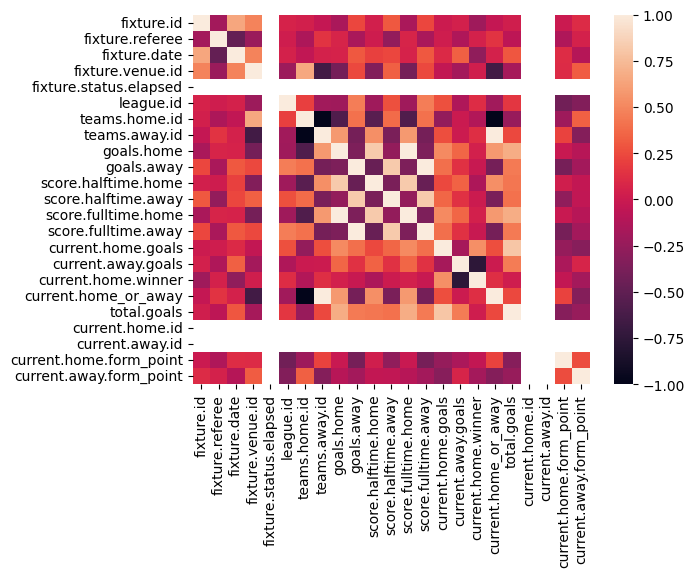

In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def custom_mapping(x):
    mapping = {False: 0, None: 1, True: 2}
    return mapping.get(x, x)

le = LabelEncoder()
filtered_data_3["fixture.referee"] = le.fit_transform(filtered_data_3["fixture.referee"])
filtered_data_3["fixture.date"] = le.fit_transform(filtered_data_3["fixture.date"])
filtered_data_3["current.home.winner"] = filtered_data_3["current.home.winner"].apply(custom_mapping)
print(filtered_data_3["current.home.winner"])
sns.heatmap(filtered_data_3.corr())


In [93]:
filtered_data_3.columns
X = filtered_data_3.iloc[:, [1,3,6,20,22,23,26,27]]
X = X.fillna(0)
X


,fixture.referee,fixture.venue.id,league.id,current.home_or_away,current.home.id,current.away.id,current.home.form_point,current.away.form_point
0,14,0.0,78,1.0,157,169,3.25,1.75
1,1,0.0,78,1.0,157,169,3.75,0.25
2,11,0.0,78,1.0,157,169,3.25,0.00
3,15,0.0,81,1.0,157,169,3.00,0.75
4,5,0.0,78,1.0,157,169,2.50,1.25
5,15,0.0,78,1.0,157,169,3.25,0.00
6,15,0.0,78,1.0,157,169,3.25,1.50
7,15,0.0,78,1.0,157,169,3.75,3.25
8,15,0.0,78,1.0,157,169,2.00,0.75
9,7,700.0,78,1.0,157,169,2.25,0.25


<Axes: >

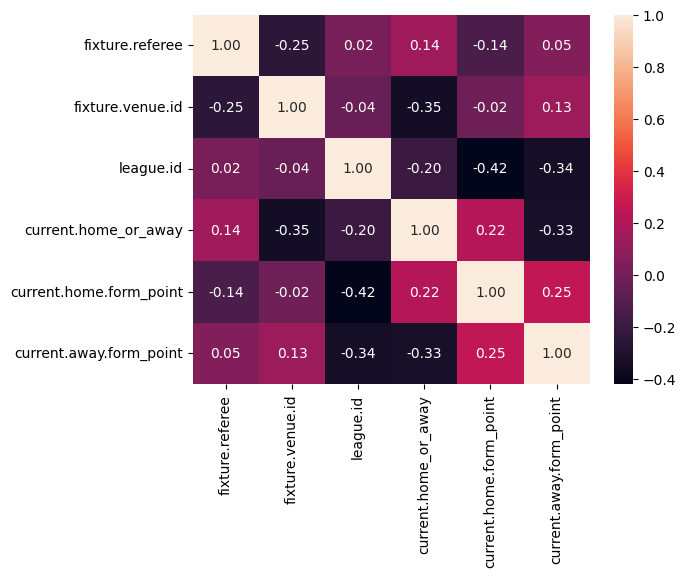

In [95]:
sns.heatmap(X.iloc[:, [0,1,2,3,6,7]].corr(), annot=True, fmt=".2f")

In [96]:
y = filtered_data_3["current.home.winner"].tolist()
y

[2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2]

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test


[2, 0, 2, 1, 2, 2]

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
import numpy as np
y_pred = model.predict(X_test)
# y_pred = np.around(y_pred)
print(y_test)
print(y_pred)

[2, 0, 2, 1, 2, 2]
[1.5310782  2.130578   1.40686333 1.30850933 1.61347456 1.54237986]


In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6666666666666666

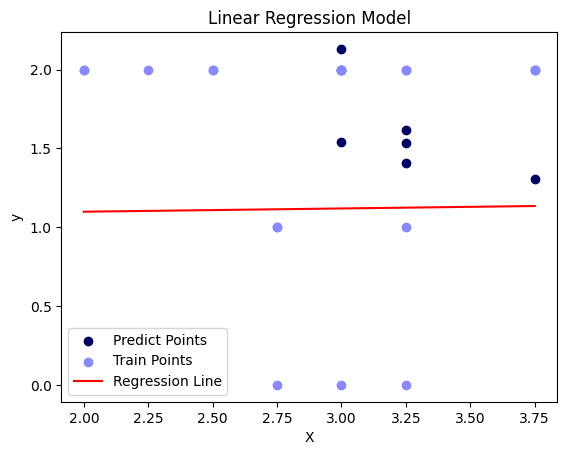

In [138]:
import matplotlib.pyplot as plt

# Obtain the slope and intercept from the model
slope = model.coef_[0]
intercept = model.intercept_

# Create the regression line
x_range = np.linspace(np.min(X_train["current.home.form_point"].tolist()), np.max(X_train["current.home.form_point"].tolist()), 100)
y_range = slope * x_range + intercept

# Plot the prediction data points
plt.scatter(X_test["current.home.form_point"].tolist(), y_pred, color='#006', label='Predict Points')
# Plot the train data points
plt.scatter(X_train["current.home.form_point"].tolist(), y_train, color='#88f', label='Train Points')

# Plot the regression line
plt.plot(x_range, y_range, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')

# Add legend
plt.legend()

# Show the plot
plt.show()